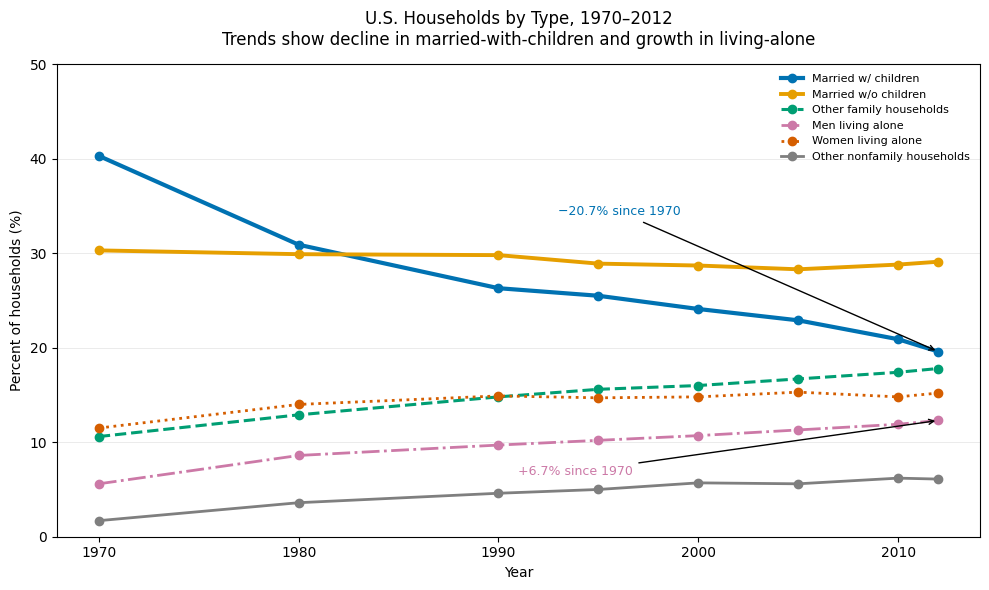

In [ ]:
# --- Setup
import pandas as pd
import matplotlib.pyplot as plt

years = [1970,1980,1990,1995,2000,2005,2010,2012]
data = {
    "Married w/ children":       [40.3,30.9,26.3,25.5,24.1,22.9,20.9,19.6],
    "Married w/o children":      [30.3,29.9,29.8,28.9,28.7,28.3,28.8,29.1],
    "Other family households":   [10.6,12.9,14.8,15.6,16.0,16.7,17.4,17.8],
    "Men living alone":          [ 5.6, 8.6, 9.7,10.2,10.7,11.3,11.9,12.3],
    "Women living alone":        [11.5,14.0,14.9,14.7,14.8,15.3,14.8,15.2],
    "Other nonfamily households":[ 1.7, 3.6, 4.6, 5.0, 5.7, 5.6, 6.2, 6.1],
}
df = pd.DataFrame(data, index=years)

# --- Plot: multi-line with improvements (labels on lines, clear palette, annotations)
plt.figure(figsize=(10,6))

# colorblind-friendly (Okabe–Ito) + neutral gray
colors = {
    "Married w/ children":"#0072B2",       # blue
    "Married w/o children":"#E69F00",      # orange
    "Other family households":"#009E73",   # green
    "Men living alone":"#CC79A7",          # magenta
    "Women living alone":"#D55E00",        # vermillion
    "Other nonfamily households":"#7F7F7F" # gray
}

# line styles/weights: emphasize married groups
styles = {
    "Married w/ children":("solid",3.0),
    "Married w/o children":("solid",2.8),
    "Other family households":("dashed",2.2),
    "Men living alone":("dashdot",2.0),
    "Women living alone":("dotted",2.0),
    "Other nonfamily households":("solid",2.0),
}

for col in df.columns:
    ls, lw = styles[col]
    plt.plot(df.index, df[col], marker='o', linewidth=lw, linestyle=ls, color=colors[col], label=col)

# axes, grid, title/subtitle
plt.title("U.S. Households by Type, 1970–2012\nTrends show decline in married-with-children and growth in living-alone", pad=14)
plt.xlabel("Year")
plt.ylabel("Percent of households (%)")
plt.ylim(0, 50)
plt.grid(True, axis='y', linewidth=0.5, alpha=0.35)

# annotations: largest drop and rise
drop_series = "Married w/ children"
rise_series = "Men living alone"
plt.annotate("−20.7% since 1970",
             xy=(2012, df[drop_series].iloc[-1]),
             xytext=(1993, 34),
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=9, color=colors[drop_series])

plt.annotate("+6.7% since 1970",
             xy=(2012, df[rise_series].iloc[-1]),
             xytext=(1991, 6.5),
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=9, color=colors[rise_series])

# small legend kept for accessibility; direct labels carry most load
plt.legend(loc='upper right', frameon=False, fontsize=8)

# Centered source note under plot
fig.text(0.5, 0.04, "Source: U.S. Census Bureau, CPS (selected years, 1970–2012).",
         ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()



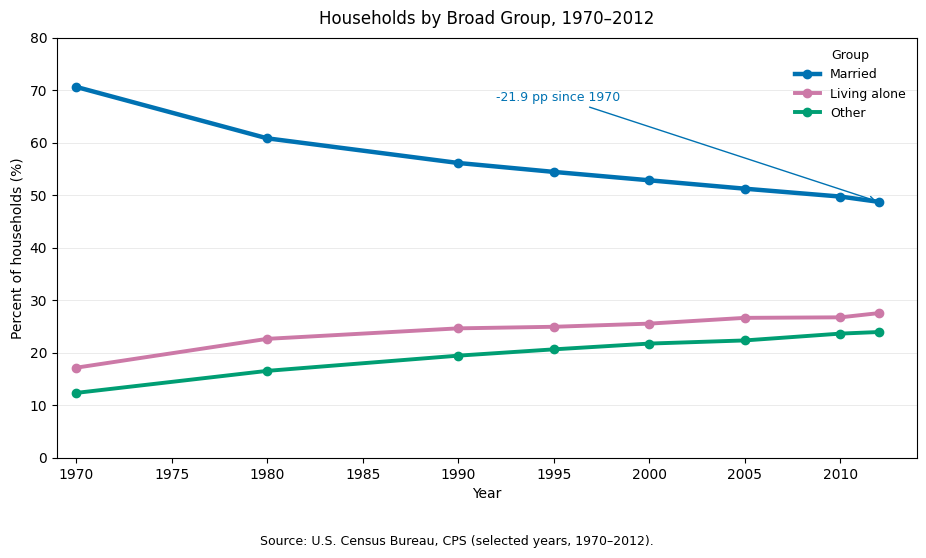

In [ ]:
# --- Exercise 3 (finalized): remove end labels, legend top-right

fig3, ax3 = plt.subplots(figsize=(10,6))
plt.subplots_adjust(left=0.10, right=0.96, top=0.88, bottom=0.18)

# Emphasize Married slightly, keep others consistent
lw = {"Married":3.2, "Living alone":2.8, "Other":2.8}

for k in ["Married","Living alone","Other"]:
    ax3.plot(condensed.index, condensed[k],
             marker='o', linewidth=lw[k], label=k, color=c3[k])

# Axes and grid
ax3.set_title("Households by Broad Group, 1970–2012", pad=10)
ax3.set_xlabel("Year")
ax3.set_ylabel("Percent of households (%)")
ax3.set_ylim(0, 80)              # still tighter for contrast
ax3.set_xlim(1969, 2014)
ax3.grid(True, axis='y', linewidth=0.5, alpha=0.35)

# Legend inside top-right
leg = ax3.legend(loc="upper right", frameon=False, title="Group", fontsize=9)
leg.get_title().set_fontsize(9)

# Annotation for key decline (main story)
drop_pp = condensed.loc[2012, "Married"] - condensed.loc[1970, "Married"]
ax3.annotate(f"{drop_pp:.1f} pp since 1970",
             xy=(2012, condensed.loc[2012, "Married"]),
             xytext=(1992, 68),
             arrowprops=dict(arrowstyle="->", lw=1.0, color=c3["Married"]),
             fontsize=9, color=c3["Married"])

# Source note centered
fig3.text(0.5, 0.04, "Source: U.S. Census Bureau, CPS (selected years, 1970–2012).",
          ha='center', va='center', fontsize=9)

plt.show()


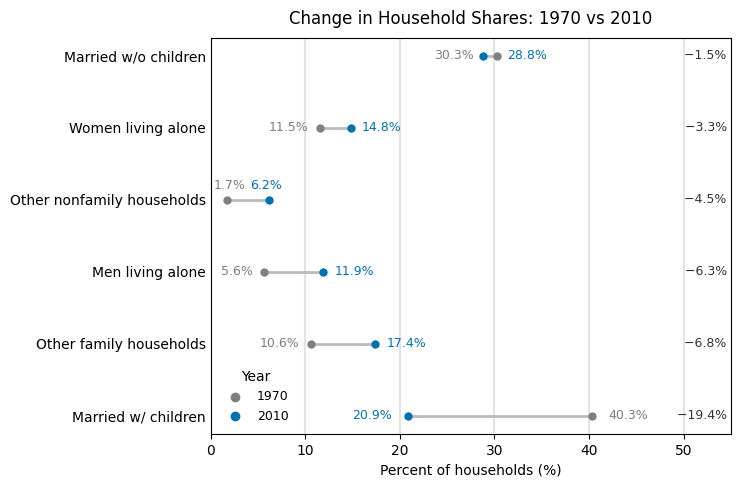

In [ ]:
# --- Exercise 4: 1970 vs 2010 similarity/difference for the 6 original types
import numpy as np

# Pull the two years and compute deltas
y0, y1 = 1970, 2010
vals_1970 = df.loc[y0]
vals_2010 = df.loc[y1]
delta = (vals_2010 - vals_1970).round(1)

# Order categories by absolute change (largest first) for clearer comparison
order = delta.abs().sort_values(ascending=False).index.tolist()

# Slopegraph / dumbbell: two points per category connected, with delta labels
fig, ax = plt.subplots(figsize=(10,6))
plt.subplots_adjust(left=0.40, right=0.92, top=0.86, bottom=0.20)

# axes styling
ax.set_title(f"Change in Household Shares: {y0} vs {y1}", pad=10)
ax.set_xlabel("Percent of households (%)")
ax.set_xlim(0, 55)
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order)
ax.grid(True, axis='x', linewidth=1.5, alpha=0.35)
ax.tick_params(axis='y', length=0)

# colors
c_1970 = "#7F7F7F"   # neutral gray for baseline
c_2010 = "#0072B2"   # blue for comparison

# Custom label spacing adjustments per category
offsets = {
    "Married w/ children":    {"left": 6.0, "right": -6.0, "dy": 0.0},  # push further apart
    "Married w/o children":   {"left": -2.5, "right": 2.5, "dy": 0.0},  # stagger slightly up
    "Other family households":{"left": -1.2, "right": 1.2, "dy": 0.0},
    "Men living alone":       {"left": -1.2, "right": 1.2, "dy": 0.0},
    "Women living alone":     {"left": -1.2, "right": 1.2, "dy": 0.}, # stagger slightly down
    "Other nonfamily households":{"left": 2.0, "right": -2.0, "dy": 0.2} # extra space
}

for i, cat in enumerate(order):
    x0 = vals_1970[cat]
    x1 = vals_2010[cat]

    # connector
    ax.plot([x0, x1], [i, i], color="#BBBBBB", linewidth=2)
    ax.plot(x0, i, 'o', color=c_1970, markersize=5)
    ax.plot(x1, i, 'o', color=c_2010, markersize=5)

    # apply per-category offsets
    off = offsets.get(cat, {"left": -1.2, "right": 1.2, "dy": 0.0})

    ax.text(x0 + off["left"], i + off["dy"], f"{x0:.1f}%",
            va="center", ha="right", color=c_1970, fontsize=9)
    ax.text(x1 + off["right"], i + off["dy"], f"{x1:.1f}%",
            va="center", ha="left", color=c_2010, fontsize=9)

    # delta label
    xmax = ax.get_xlim()[1]  # right boundary of x-axis
    ax.text(xmax, i, f"{sign}{abs(x1-x0):.1f}% ",
            va="center", ha="right", fontsize=9, color="#333333")



# legend proxy moved to bottom right to avoid overlap with labels
ax.scatter([], [], color=c_1970, label=str(y0))
ax.scatter([], [], color=c_2010, label=str(y1))
ax.legend(frameon=False, loc="lower left", title="Year", fontsize=9)


plt.show()
